In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train, y_train = X_train_full[:-5_000], y_train_full[:-5_000]
X_valid, y_valid = X_train_full[-5_000:], y_train_full[-5_000:]

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

# Visualize

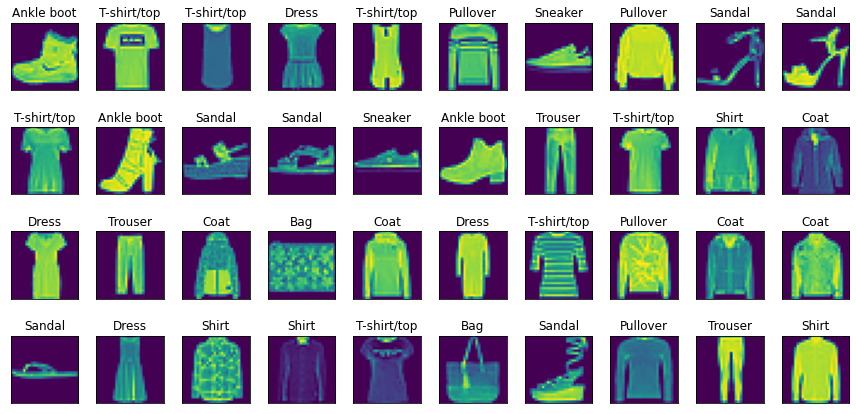

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 10, figsize=(12, 6))

axes = axes.flatten()
for i in range(40):
  img = X_train[i]
  ax = axes[i]
  title = class_names[y_train[i]]

  ax.imshow(img)
  ax.set_title(title)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

fig.tight_layout()

# Create the model

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add( tf.keras.layers.Input(shape=(28, 28)) )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(300, activation="relu") )
model.add( tf.keras.layers.Dense(100, activation="relu") )
model.add( tf.keras.layers.Dense(10, activation="softmax") )

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile( loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"] )

# Training model

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7359 - accuracy: 0.7582 - val_loss: 0.5080 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4930 - accuracy: 0.8282 - val_loss: 0.4577 - val_accuracy: 0.8352
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4448 - accuracy: 0.8435 - val_loss: 0.4233 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4188 - accuracy: 0.8530 - val_loss: 0.3934 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3974 - accuracy: 0.8601 - val_loss: 0.3867 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3806 - accuracy: 0.8650 - val_loss: 0.3906 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3686 - accuracy: 0.8692 - val_loss: 0.3703 - val_accuracy

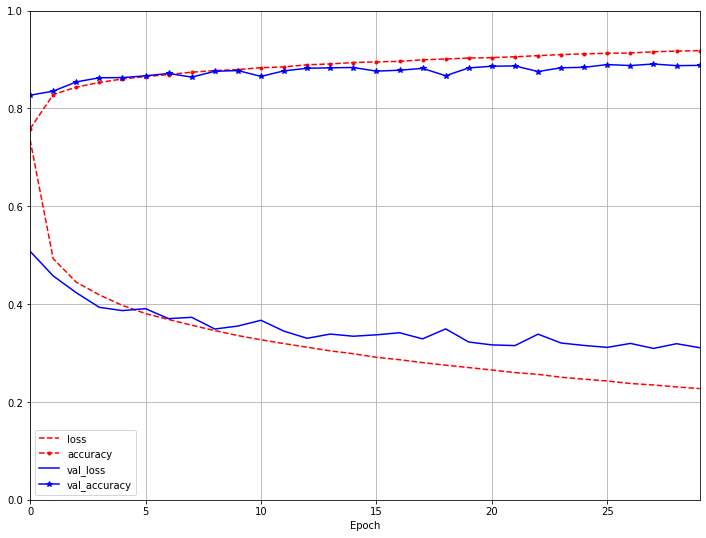

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(12, 9),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show();

In [24]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 2s 7ms/step - loss: 0.3261 - accuracy: 0.8845


[0.3261365592479706, 0.8845000267028809]